In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Análise de Fluxos Migratórios: A Evolução da Imigração para o Canadá (1980 - 2013)
1. Contexto e Objetivos
O Canadá é reconhecido mundialmente como um dos países mais acolhedores e multiculturais, com políticas de imigração que moldaram a sua demografia e economia ao longo das décadas. Este projeto visa explorar e visualizar as tendências de imigração para o país ao longo de 33 anos.

Nesta análise, buscamos responder a perguntas fundamentais:

De onde vêm os novos residentes? Identificar os países que mais contribuíram para o crescimento populacional canadense.

Houve mudanças geopolíticas? Analisar se a origem dos imigrantes mudou de continentes tradicionais (como a Europa) para novas potências (como a Ásia).

Quais são os padrões temporais? Observar picos e quedas no fluxo migratório e relacioná-los, quando possível, a contextos históricos.

2. Sobre o Conjunto de Dados
Os dados utilizados foram extraídos do relatório da Organização das Nações Unidas (ONU), contendo estatísticas anuais de fluxos de imigrantes internacionais para o Canadá. O dataset abrange:

Período: 1980 a 2013.

Abrangência: 195 países e diversos continentes/regiões.

Ferramentas: A análise foi desenvolvida em Python, utilizando as bibliotecas Pandas para manipulação de dados e Seaborn/Matplotlib (com suporte de Plotly para interatividade) para as visualizações.


In [4]:
df = pd.read_csv('data/imigracao_canada_raw.csv')

In [5]:
# definindo os países como indices do df
df.set_index('País', inplace = True)

In [6]:
# Fazendo uma lista com os anos de 1980 a 2013
anos = list(map(str, range(1980, 2014)))

In [7]:
# Separando os países pelas regiões Europa, América Latina e Ásia
europa = df.query("Continente == 'Europa'")
america_latina = df.query("Continente == 'América Latina e o Caribe'")
asia = df.query("Continente == 'Ásia'")

In [8]:
# Agrupando o continente, somando as colunas de anos e tranformando os anos em indice
europa = europa.groupby('Continente')[anos].sum()
europa = europa.transpose()

america_latina = america_latina.groupby('Continente')[anos].sum()
america_latina = america_latina.transpose()


asia = asia.groupby('Continente')[anos].sum()
asia = asia.transpose()


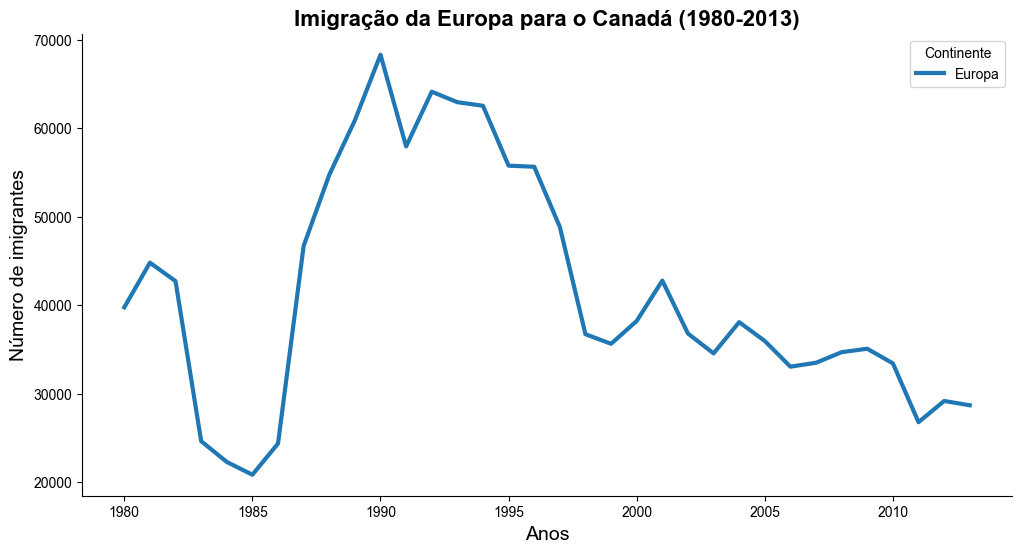

In [9]:
# Gerando gráfico da Europa
#definindo dimensão da figura
fig, ax = plt.subplots(figsize=(12,6))
#adicionando um título
plt.title('Imigração da Europa para o Canadá (1980-2013)', fontweight='bold', fontsize=16)
#legenda eixo x
plt.xlabel('Anos', fontsize=14)
#legenda eixo y
plt.ylabel('Número de imigrantes', fontsize=14)

ax = sns.lineplot(europa, lw=3)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

sns.set_theme(style='white')
sns.despine()

plt.show()

Historicamente, a Europa foi a principal origem de imigrantes para o Canadá desde o século XIX até meados do século XX. Ainda no início dos anos 1980, uma grande parte dos imigrantes era europeia.

No início dos anos 1980: houve uma queda na entrada de imigrantes devido a recessão econômica, com alta inflação e desemprego, o que torno o país menos atrativo e mais difícil para os recém-chegados encontrarem trabalho e se estabilizarem.

Entre os anos de 1985 e início dos anos 1990 houve uma forte recuperação.

Década de 2000 em diante houve uma queda constante no numero de imigração



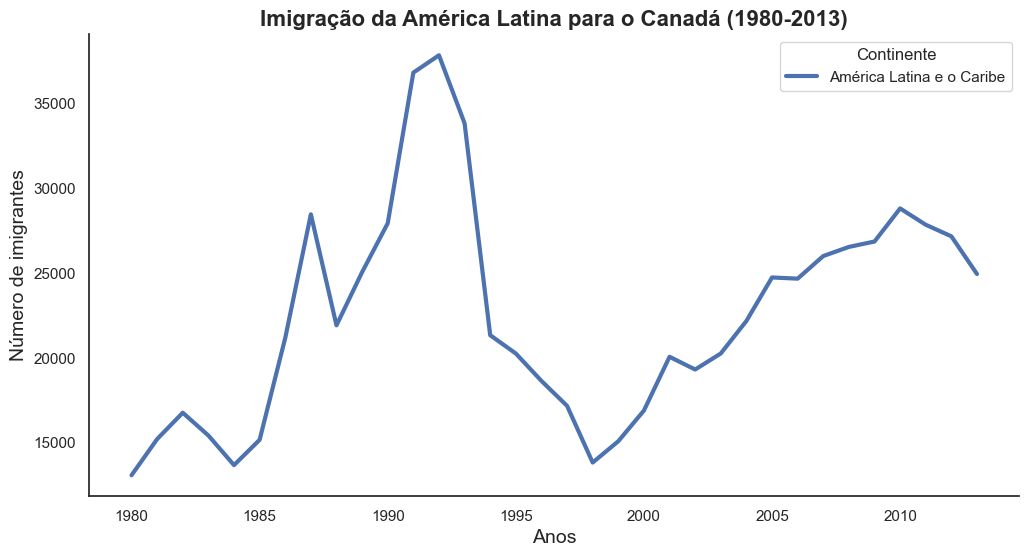

In [10]:
# Gerando gráfico da América Latina
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.lineplot(america_latina, lw=3)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.title('Imigração da América Latina para o Canadá (1980-2013)', fontweight='bold', fontsize=16)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de imigrantes', fontsize=14)

sns.set_theme(style='white')
sns.despine()

plt.show()

Diferentemente da Europa, a América Latina nunca foi a principal região de origem de imigrantes para o Canadá, mas ganhou relevância progressiva ao decorrer dos anos, sobretudo por refugiados e, mais tarde, por migração econômica e familiar.

Entre os anos 80 e 90 houve um aumento significativo em relação as outras décadas, por motivos de ditaduras militares e guerras civis na América Central e do sul, além de política canadense aberta a refugiados.

Já no inicio da decáda de 90 houve uma queda no número de imigrantes devido ao fim de muitos conflitos armados e imigrantes optando EUA e Europa.

Apartir dos anos 2000 a imigração se mantém relativamente estável, o fluxo se tornou mais econômico e educacional, especialmente com brasileiros.


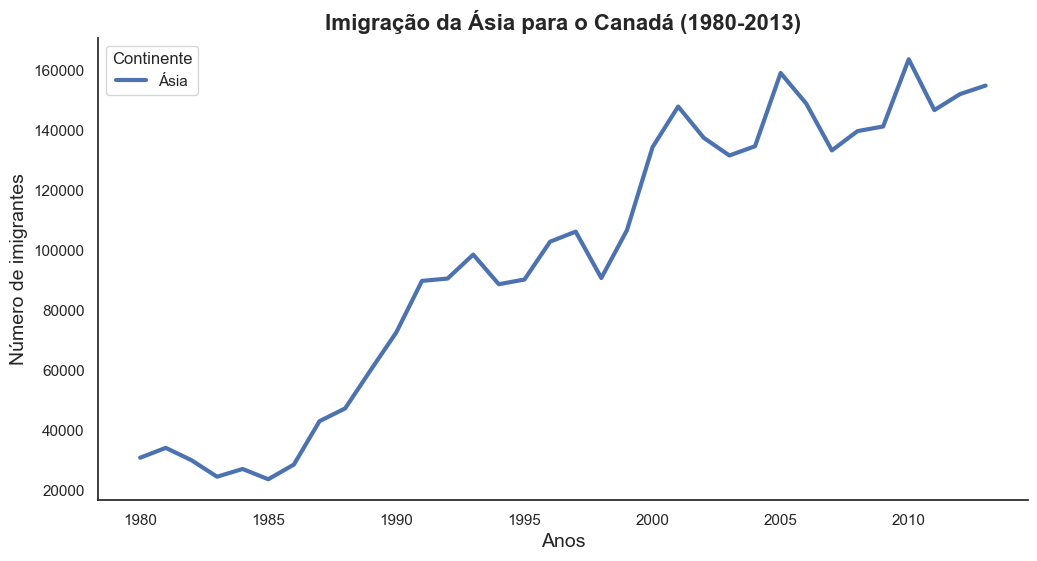

In [11]:
# Gerando gráfico da Ásia
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.lineplot(asia, lw=3)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.title('Imigração da Ásia para o Canadá (1980-2013)', fontweight='bold', fontsize=16)
plt.xlabel('Anos', fontsize=14)
plt.ylabel('Número de imigrantes', fontsize=14)

sns.set_theme(style='white')
sns.despine()

plt.show()

Desde a reforma do sistema migratório em 1967 (modelo baseado em pontos), o Canadá passou a selecionar imigrantes com base em: escolaridade, proficiência em inglês/francês, experiência profissional, idade.

Esse modelo favoreceu fortemente países asiáticos com alta produção de capital humano (engenheiros, médicos, profissionais de TI).

Além disso, o rápido crescimento populacional na ásia, expansão da classe média asiática, globalizaçao e mobilidade estudantil contribuiram para o aumento no número de imigrantes. Com destaque para países como China, Indía e Filipinas.


In [12]:
# Tranforma o DataFrame de uma coluna em uma Series
asia = asia.squeeze()
europa = europa.squeeze()
america_latina = america_latina.squeeze()

In [13]:
# Criando a figura
fig = go.Figure()

# Adicionando a linha da Ásia
fig.add_trace(go.Scatter(
    x=asia.index, y=asia.values,
    mode='lines',
    name='Ásia',
    line=dict(color='#00BFFF', width=3),
    hovertemplate='<b>Ano:</b> %{x}<br><b>Imigrantes:</b> %{y:,}<extra></extra>'
))

# Adicionando a linha da Europa
fig.add_trace(go.Scatter(
    x=europa.index, y=europa.values,
    mode='lines',
    name='Europa',
    line=dict(color='#FF7F50', width=3),
    hovertemplate='<b>Ano:</b> %{x}<br><b>Imigrantes:</b> %{y:,}<extra></extra>'
))

# Adicionando a linha da América Latina
fig.add_trace(go.Scatter(
    x=america_latina.index, y=america_latina.values,
    mode='lines',
    name='América Latina',
    line=dict(color='#32CD32', width=3),
    hovertemplate='<b>Ano:</b> %{x}<br><b>Imigrantes:</b> %{y:,}<extra></extra>'
))

# Personalizando o Layout (Estética e Interatividade)
fig.update_layout(
    title='<b>Imigração dos continentes para o Canadá (1980-2013)</b>',
    title_x=0.5, # Centraliza o título
    xaxis_title='Anos',
    yaxis_title='Número de Imigrantes',
    template='plotly_white',
    legend=dict(title='Continentes', yanchor="top", y=0.99, xanchor="left", x=0.01),
    hovermode='x unified',
    font=dict(size=14)
)

# Ajustando o intervalo do eixo X para aparecer de 5 em 5 anos
fig.update_xaxes(dtick=5)

fig.show()

Até a década de 60, o Canadá tinha políticas que favoreciam abertamente imigrantes europeus. No entanto, em 1967, o Canadá consolidou o Sistema de Pontos.

O crescimento econômico e a pressão demográfica na Índia e na China, somados à política canadense de atrair profissionais de TI e engenharia, transformaram esses países nos maiores fornecedores de imigrantes. Conflitos no Sudeste Asiático e no Oriente Médio também contribuíram para fluxos constantes por razões humanitárias.

A América Latina mostra um crescimento constante, porém mais modesto e estável. Picos sutis geralmente coincidem com períodos de instabilidade econômica na América Latina (crises inflacionárias e regimes políticos).

Já a Europa mostra uma tendência de queda ou estabilidade. Isso ocorre porque com a recuperação da União Europeia, o cidadão europeu passou a ter mobilidade interna. Além do envelhecimento populacional onde a Europa deixou de ter um "excesso" de jovens buscando novas fronteiras, ao contrário da Ásia.


In [14]:
america_sul = df.query("Região == 'América do Sul'")
america_sul = america_sul.sort_values(by='Total', ascending=False)

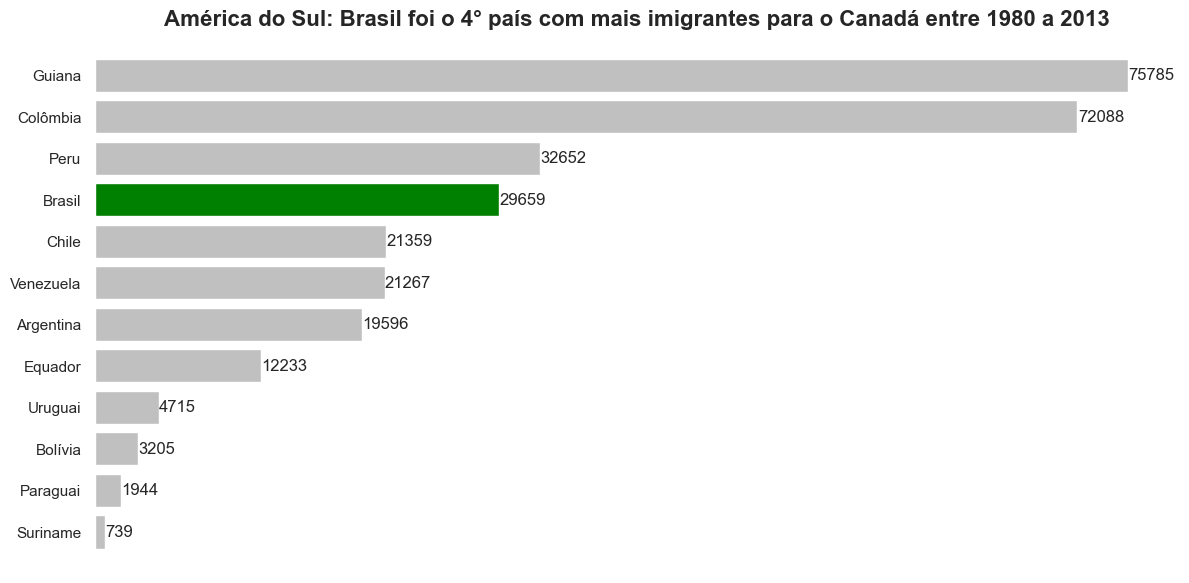

In [15]:
cores = []

# Deixando o Brasil em destaque no gráfico
for pais in america_sul.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')


fig, ax = plt.subplots(figsize=(14,7))
#gera um gráfico de barras
ax.barh(america_sul.index, america_sul['Total'], color=cores)
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.invert_yaxis()

for i, v in enumerate(america_sul['Total']):
    ax.text(v + 20, i, str(v), fontsize=12, ha='left', va='center')

ax.set_title('América do Sul: Brasil foi o 4° país com mais imigrantes para o Canadá entre 1980 a 2013', fontsize=16, fontweight='bold')

sns.set_style('white')
sns.despine()


plt.show()



A Guiana é um caso fascinante no contexto da imigração canadense, pois, apesar de ser um país pequeno na América do Sul, ela possui uma das maiores taxas de emigração do mundo.
Após a independência do Reino Unido em 1966, a Guiana viveu décadas de tensões políticas entre os dois principais grupos étnicos: os de ascendência indiana (Indo-guianenses) e os de ascendência africana (Afro-guianenses).
Muitos guianenses de origem indiana sentiam-se marginalizados pelo governo da época e buscaram refúgio ou imigração econômica no Canadá.
Nos anos 80, a Guiana enfrentou uma depressão econômica severa, com falta de produtos básicos e infraestrutura colapsada. Isso gerou o que os sociólogos chamam de "Brain Drain" (Fuga de Cérebros): a classe média educada e profissionais de saúde viram no Canadá uma saída segura.
Como a Guiana faz parte da Commonwealth (Comunidade de Nações ex-colônias britânicas), os laços com o Canadá já eram pré-estabelecidos.
O domínio do inglês dava aos guianenses uma vantagem competitiva imediata no sistema de pontos em comparação com imigrantes de países vizinhos que falavam espanhol ou português.

O caso da Colômbia é muito diferente do caso da Guiana. Enquanto a Guiana migrou por laços coloniais e crise econômica, a Colômbia teve um fluxo impulsionado por um dos conflitos civis mais longos do mundo.
Entre as décadas de 90 e 2000, a Colômbia viveu o auge da violência envolvendo cartéis de drogas, guerrilhas (como as FARC e o ELN) e grupos paramilitares.
Milhões de colombianos foram forçados a deixar suas casas. Muitos da classe média e profissionais qualificados escolheram o Canadá como destino para solicitar asilo ou refúgio.
O medo de sequestros e a violência urbana generalizada fizeram com que famílias inteiras buscassem a estabilidade do sistema canadense.
Diferente do "Sistema de Pontos" puro que a Ásia utiliza para trabalho, o Canadá abriu portas específicas para colombianos através de programas humanitários.
O governo canadense reconheceu a Colômbia como uma zona de risco crítico, facilitando o processamento de vistos de proteção.
Isso explica por que a Colômbia supera o Brasil (que é muito maior) no gráfico. O Brasil não tinha um contexto de guerra civil que justificasse pedidos de refúgio em massa.
Além da violência, a instabilidade política gerou crises econômicas que levaram profissionais qualificados a buscar o Canadá. Como a Colômbia tem um bom sistema de educação superior, muitos colombianos conseguiram pontuar bem no sistema de imigração econômica quando o clima de segurança se tornava insustentável.


O Brasil aparece em 4º porque, durante boa parte desse período (1980-2013), o brasileiro não via o Canadá como prioridade. O foco era o Japão ou os EUA. A "febre" do Canadá no Brasil é um fenômeno mais recente, impulsionado pela busca por segurança e pelo marketing de agências de intercâmbio.



In [16]:
paises_10 = df.sort_values('Total', ascending=False)
paises_10 = paises_10.head(10)

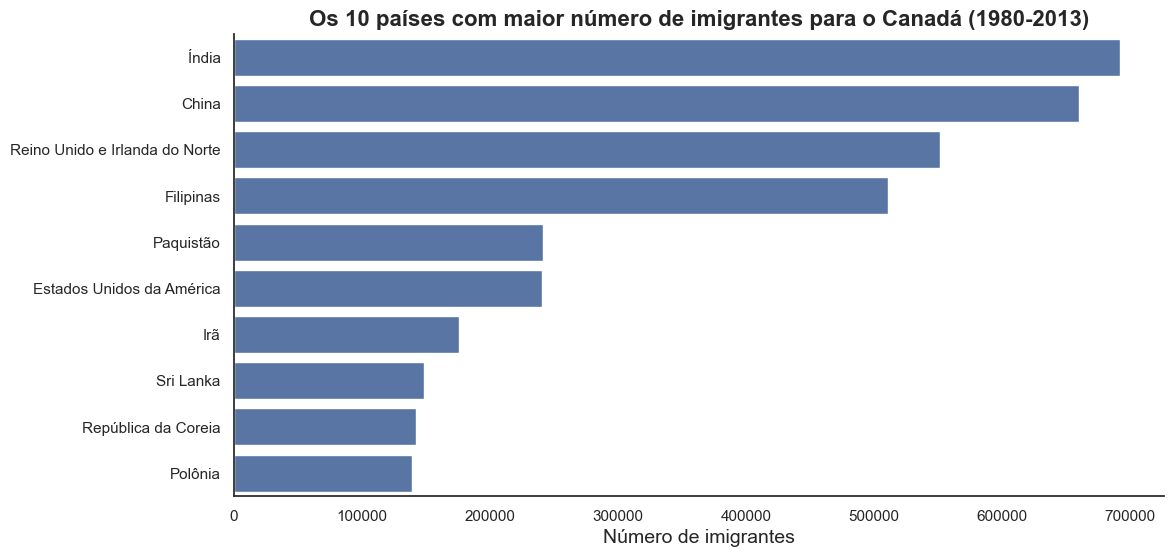

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(data=paises_10, y=paises_10.index, x=paises_10['Total'], orient='h')
ax.set_title('Os 10 países com maior número de imigrantes para o Canadá (1980-2013)', fontweight='bold', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
sns.despine()

plt.show()


A liderança absoluta da Indía e China deve-se a uma combinação de demografia e estratégia econômica do Canadá. Com o sistema de imigração focado em qualificações (Educação, Idioma e Experiência), esses países tornaram-se os maiores fornecedores de profissionais de tecnologia e engenharia. Muitos chineses e indianos imigram inicialmente como estudantes. O Canadá facilita a transição de visto de estudante para residência permanente, o que cria um fluxo contínuo de jovens qualificados.
Como ex-colônia britânica e membro da Commonwealth, a Índia tem uma vantagem natural na proficiência do inglês, um dos critérios que mais gera pontos no sistema canadense.

O que chama atenção é o Sri Lanka e tem uma explicação histórica muito específica e dramática: a Guerra Civil do Sri Lanka. A guerra opôs o governo (maioria cingalesa) aos Tigres do Tâmil (minoria que buscava um estado independente).
O período de maior imigração coincide com os anos mais violentos do conflito. Milhares de tâmeis fugiram da perseguição e dos combates na ilha. O Canadá possui uma das maiores comunidades da diáspora tâmil do mundo (especialmente em Toronto). O governo facilitou a entrada de pessoas nessas condições através da Classe de Refugiados e por razões humanitárias.
